# Goals For Housing Dataset - EDA
1. Summary statistics Of Dataset- Graphical & Non Graphical 
2. Ouliers Count in the Numericals Features
3. Multicolinearity
4. Frequency Distribution in the Categorical Features
5. Find out Features those having more imapct on target variable

### Import necessary Packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re
from collections import defaultdict
from collections import Counter 
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from matplotlib import cm
cmap = cm.get_cmap('jet')

### Import the test and train Dataset

In [2]:
test = pd.read_csv('D:\HATHWAY ISP\DSC\Project\Housing\\test.csv')
train = pd.read_csv('D:\HATHWAY ISP\DSC\Project\Housing\\train.csv')

### How many Observations and features in the Dataset?

In [3]:
print('(Observations, Features )' )
train.shape

(Observations, Features )


(1460, 81)

## Summary statistics Of Numerical Feature 
* Below Summary Contains Percentage & Count of Missing data points in Numerical Features
* Data Points that contains Zeros in percentage & count in a Numerical Features  
* Only 3 Numerical Features have missing data points but more than 20 Features have data points with Zero value

In [6]:
data_num=Numeric_Info(train)
data_num.sort_values(by=['Missing_%'], ascending=False)

,Missing_%,Missing_Count,Zero_%,Zeros_Count,Distinct_Count,Mean,Std_From_Mean,Median,Std_From_Median
Feature_Name,,,,,,,,,
LotFrontage,17.739726,259.0,0.000000,0.0,111.0,70.049958,24.284752,69.0,NaN
GarageYrBlt,5.547945,81.0,0.000000,0.0,98.0,1978.506164,24.689725,1980.0,NaN
MasVnrArea,0.547945,8.0,58.972603,861.0,328.0,103.685262,181.066207,0.0,NaN
Id,0.000000,0.0,0.000000,0.0,1460.0,730.500000,421.610009,730.5,421.610009
OpenPorchSF,0.000000,0.0,44.931507,656.0,202.0,46.660274,66.256028,25.0,69.709040
KitchenAbvGr,0.000000,0.0,0.068493,1.0,4.0,1.046575,0.220338,1.0,0.225210
TotRmsAbvGrd,0.000000,0.0,0.000000,0.0,12.0,6.517808,1.625393,6.0,1.705934
Fireplaces,0.000000,0.0,47.260274,690.0,4.0,0.613014,0.644666,1.0,0.751968
GarageCars,0.000000,0.0,5.547945,81.0,5.0,1.767123,0.747315,2.0,0.782783


## Compare Missing Percentage Vs Zero Percentage In a Dataset
* Percentage of Missing data points is less when compared with Zero values in the dataset

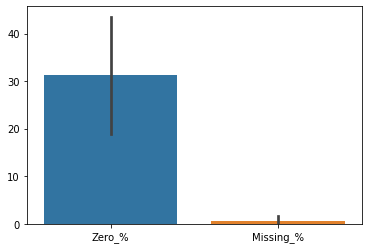

In [7]:
sns.barplot(data=data_num[['Zero_%', 'Missing_%']])

## List the Features that contains more than 50 % Zero Values
* Top 10 Numerical Features in the dataset that contains Zero values 

In [8]:
data_num[data_num['Zero_%'] > 50].sort_values(ascending=False,by='Zero_%')

,Missing_%,Missing_Count,Zero_%,Zeros_Count,Distinct_Count,Mean,Std_From_Mean,Median,Std_From_Median
Feature_Name,,,,,,,,,
PoolArea,0.000000,0.0,99.520548,1453.0,8.0,2.758904,40.177307,0.0,40.271985
3SsnPorch,0.000000,0.0,98.356164,1436.0,20.0,3.409589,29.317331,0.0,29.515066
LowQualFinSF,0.000000,0.0,98.219178,1434.0,24.0,5.844521,48.623081,0.0,48.973318
MiscVal,0.000000,0.0,96.438356,1408.0,21.0,43.489041,496.123024,0.0,498.026755
BsmtHalfBath,0.000000,0.0,94.383562,1378.0,3.0,0.057534,0.238753,0.0,0.245592
ScreenPorch,0.000000,0.0,92.054795,1344.0,76.0,15.060959,55.757415,0.0,57.757054
BsmtFinSF2,0.000000,0.0,88.561644,1293.0,144.0,46.549315,161.319273,0.0,167.905425
EnclosedPorch,0.000000,0.0,85.753425,1252.0,120.0,21.954110,61.119149,0.0,64.945081
HalfBath,0.000000,0.0,62.534247,913.0,3.0,0.382877,0.502885,0.0,0.632130


## List the Missing % in Categorical Feature. 
* Missing Percentage in Categorical Features is more as compared to  Numerical Features  
* We can easily see From Below Chart top 5 categorical Featues that contain near about 50% Missing data points

In [9]:
data_cat = Categorical_Info(train)
data_cat=data_cat.sort_values(by='Missing_%', ascending=False)
data_cat_mis=data_cat[data_cat['Missing_%'] > 0]
data_cat_mis

,Mode,Missing_%,Missing_Count,Distinct_Count
Feature_Name,,,,
PoolQC,NaN,99.520548,1453.0,4.0
MiscFeature,NaN,96.301370,1406.0,5.0
Alley,NaN,93.767123,1369.0,3.0
Fence,NaN,80.753425,1179.0,5.0
FireplaceQu,NaN,47.260274,690.0,6.0
GarageType,Attchd,5.547945,81.0,7.0
GarageCond,TA,5.547945,81.0,6.0
GarageQual,TA,5.547945,81.0,6.0
GarageFinish,Unf,5.547945,81.0,4.0


### Frequncy Distribution in Categorical Features
Which Feature contains how much categories & distribution of each acrosss the feature

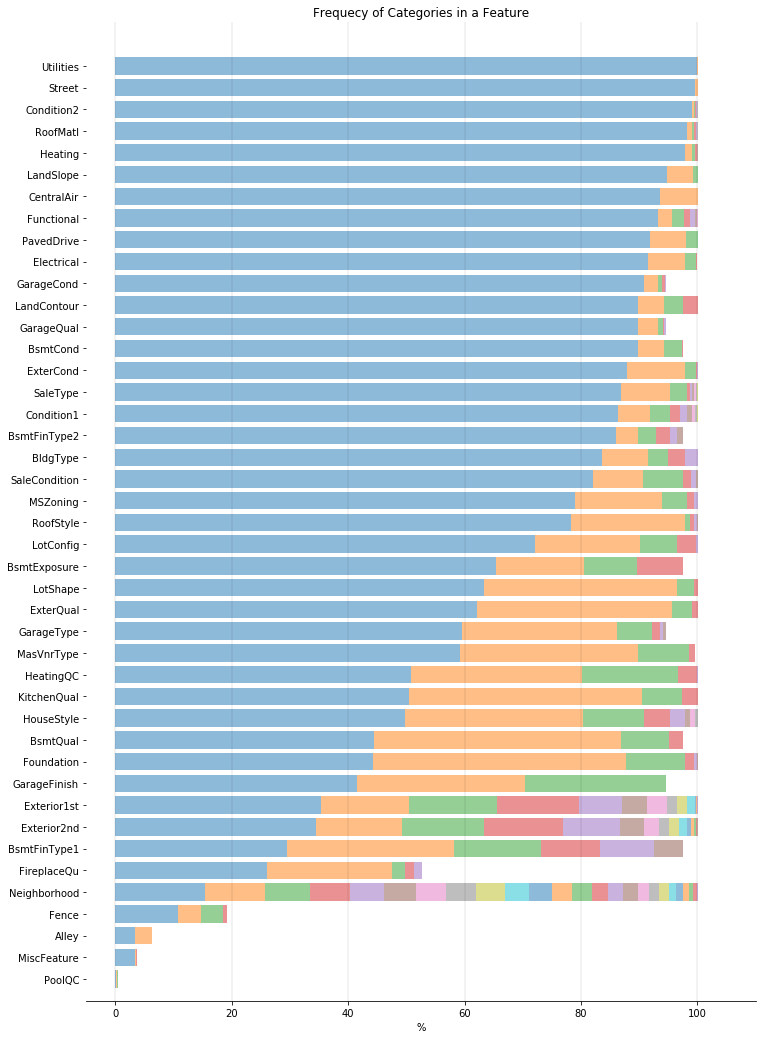

In [10]:
freq_dist_plot()

* From the above Plot We can see the Frequecy of Categories 
* About 20 Categorical Feature contains a category having 80% Data points 
* Below Chart contains Categorical Feature along with Name of the Category and percentage of that category in a feature. 
  Chart also have number of categories in that feature 

In [11]:
list_cat_summary()

,Category_%,Category_Name,No_of_Categories
Utilities,100.000000,AllPub,2.0
Street,99.657300,Pave,2.0
Condition2,99.040439,Norm,8.0
RoofMatl,98.286498,CompShg,8.0
Heating,97.875257,GasA,6.0
LandSlope,94.722413,Gtl,3.0
CentralAir,93.557231,Y,2.0
Functional,93.214531,Typ,7.0
PavedDrive,91.843729,Y,3.0
Electrical,91.432488,SBrkr,6.0


### Target Variable Distribution 
* Below Graph shows SalesPrice distribution - 

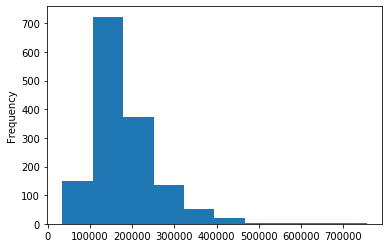

In [12]:
train['SalePrice'].plot(kind='hist')

# Outliers
## Plot the Ouliers in the Dataset Min_Outlier and Max_Outlier

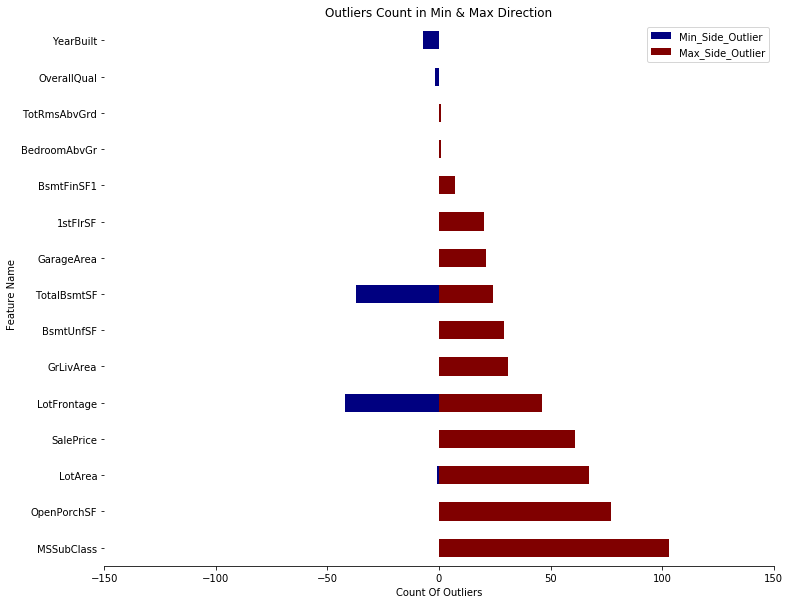

In [13]:
oulier_plot()

* Read the Graph as
* Negative values points to how many data points are outliers - towards Minumum Side
* Positive values points to how many data points are outliers   - towards Maximum Side
* MSSubClass, Bedroom, AbvGr, OverallQual are categorical Feature. YearBuilt contains Year in which House is contruncted and SalePrice is target variable 
* Ouliers data points Stat Summary only for Numerical Features in either direction is as below

In [14]:
data1 = get_outlier_num(train)
data1['Min_Side_Outlier'] = data1['Min_Side_Outlier'] * -1
featre = set(data1.index) - set(['MSSubClass','BedroomAbvGr','OverallQual','YearBuilt','SalePrice'])
data1.loc[featre].sort_values(ascending=False, by='Max_Side_Outlier')

,Min_Side_Outlier,Max_Side_Outlier
Feature_Name,,
OpenPorchSF,0.0,77.0
LotArea,1.0,67.0
LotFrontage,42.0,46.0
GrLivArea,0.0,31.0
BsmtUnfSF,0.0,29.0
TotalBsmtSF,37.0,24.0
GarageArea,0.0,21.0
1stFlrSF,0.0,20.0
BsmtFinSF1,0.0,7.0


## Multicollinearity
* POSITIVE CORELATION : If an increase in a feature A leads to increase in Feature B , then they are posivitely corelated.A value 1 means perfect positive corelation.
* NEGATIVE COREALTION : If an increase in feature A leads to decrease in feature B , then they are negatively corelated.A value -1 means perfect negative corelation
* In our dataset only Positive corelation exists 
* Below are the  Features that have positive corelation and having covariance > 0.7

In [15]:
data1=Co_Variance_Info_ex(train,0.7)
data1[['A','B','Co_Variance']]

,A,B,Co_Variance
0,TotRmsAbvGrd,GrLivArea,0.825489
1,TotalBsmtSF,1stFlrSF,0.819530
2,GarageYrBlt,YearBuilt,0.825667
3,GarageCars,GarageArea,0.882475


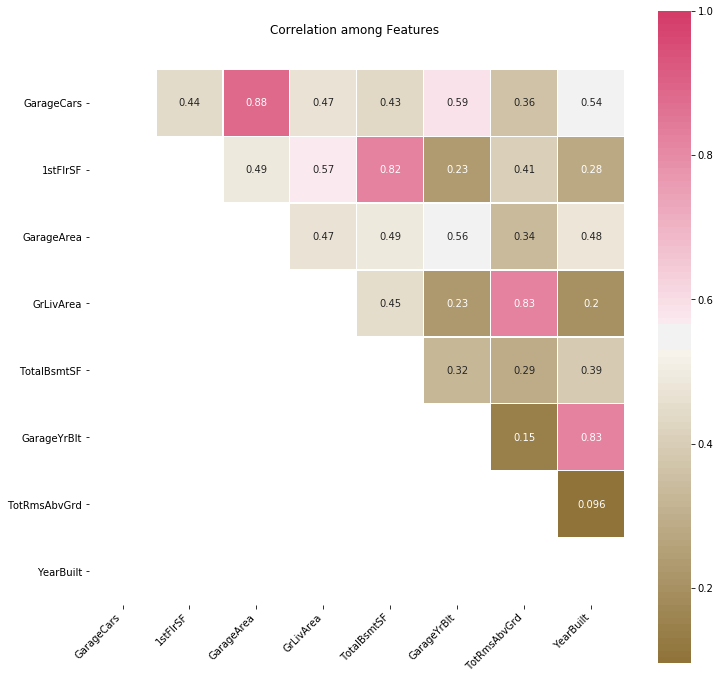

In [16]:
data1=Co_Variance_Info(train,0.7)
matrix = np.tril(train[list(set(data1['Feature_Name1']))].corr())
plt.figure(figsize = (12,12))
ax = sns.heatmap(train[list(set(data1['Feature_Name1']))].corr(),linewidths=0.1,annot = True,annot_kws = {'size': 10},
                 cmap=sns.diverging_palette( 60, 360, n=100),square=True, mask=matrix)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right');

plt.title("Correlation among Features \n\n")
plt.show()

In [17]:
data = train.corr()
data = data[data['SalePrice'] > 0.5 ]
list(data['SalePrice'].index)
cat_list = []
num_list = []
for feature in list(data['SalePrice'].index):
    if feature != 'SalePrice':
        if data_num['Distinct_Count'][feature] < 20 :
            cat_list += [feature]
        else:
            num_list += [feature]
#cat_list
#num_list

### Find Out the Categorical Features in the Numerical Features & having more imapct on target variable

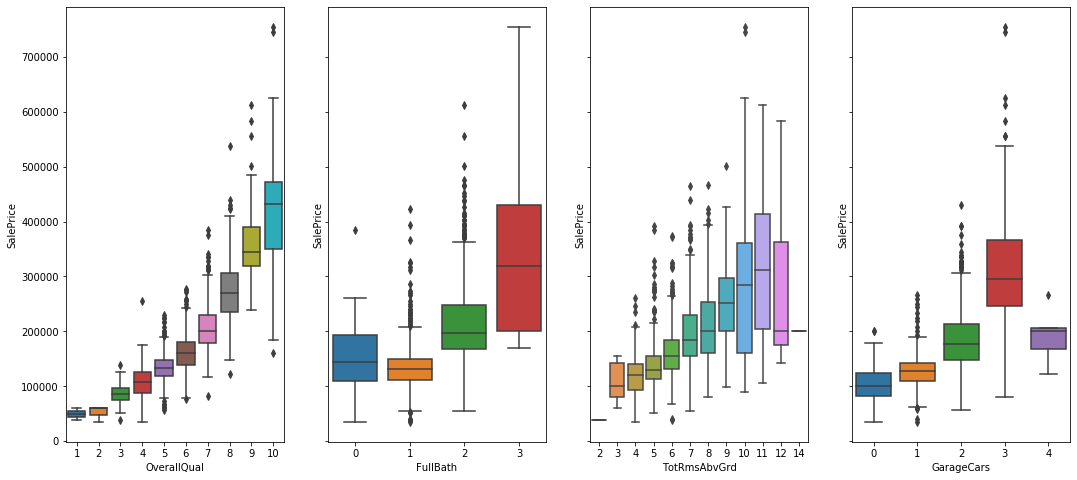

In [18]:
l = len(cat_list)
fig, axs = plt.subplots(ncols=l, figsize=(18,8), sharex=False, sharey=True)
for i in range(l):
    sns.boxplot(x=cat_list[i], y='SalePrice', data=train.sort_values(ascending=False, by=cat_list[i]), ax=axs[i])

* We can see in the above Graph SalesPrice price increases as OverallQual FullBath TotRmsAbvGrd GaageCars Features increases.
* Below is scatter plot showing that Salesprice and TotalBsmtSF, 1stFlrSF, GrLivArea,GarageArea

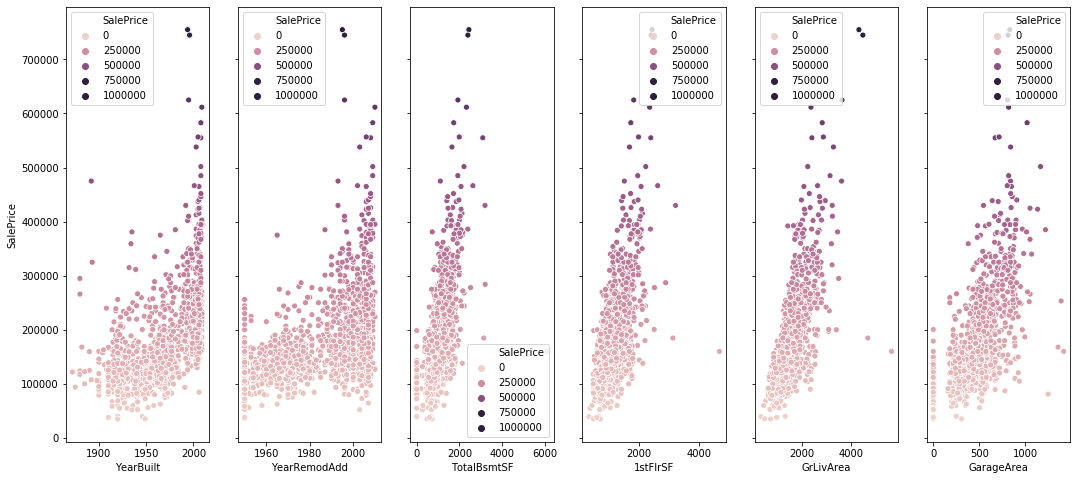

In [19]:
l = len(num_list)
fig, axs = plt.subplots(ncols=l, figsize=(18,8), sharex=False, sharey=True)
for i in range(l):
    sns.scatterplot(x=num_list[i], y="SalePrice", hue="SalePrice", data=train, ax=axs[i]);

* ########################################################################################################################
* End OF EDA - & Data Story Telling 
* ########################################################################################################################

### List of Functions Used to calculate above Graphical & Non Graphical Stat 
* . Missing Value 
* . Missing %  
* . Mean
* . Zero  Count
* . Zero  %  
* . Frequncy Distribution 
* . Outliers


In [20]:
def distinct_feature_values(train_s):
    return len(train_s.unique())
def missing_feature_values(train_s):
    return train_s.isnull().sum()
def feature_mean_value(train_s):
    return train_s.mean()
def feature_max_value(train_s):
    return train_s.max()
def feature_min_value(train_s):
    return train_s.min()
def feature_zero_value(train_s):
    return train_s[train_s == 0].count()
def feature_mode_value(train_s):
    CO = Counter(train_s)
    data, count = (CO.most_common(1)[0])
    return data
def feature_freq_dist(feature,train_s):
    return train_s.groupby(by=feature)[feature].count()
def feature_median_value(train_s):
    return train_s.median()
def feature_std_mean_value(train_s):
    return train_s.std()
def feature_std_median_value(train_s):
    std = 0
    for value in train_s:
        std += (value - train_s.median()) ** 2 
        std_md = (np.sqrt(std) / np.sqrt(len(train_s) - 1 ) )
    return std_md


# this function will return the min and max value outlier of the feature on single dimension 

def feature_outlier_values(train_s,feature):
    outlier_Q3 = train_s[train_s[feature] > train_s[feature].median()]
    Q3 = outlier_Q3[feature].sort_values().median()
    outlier_Q1 = train_s[train_s[feature] < train_s[feature].median()]
    Q1 = outlier_Q1[feature].sort_values().median()
    IQR = Q3-Q1
    High = (Q3) + (1.5 * IQR)
    Low = (Q1) - (1.5 * IQR)
    if train_s[feature].min() > Low:
        Low = train_s[feature].min()
    if train_s[feature].max() < High:
        High = train_s[feature].max()
    return High , Low

# this function will return Dataframe of features containing outlier count in both direction  

def get_outlier_num(train):
    data1 = pd.DataFrame(np.random.rand(0, 3) * 0, columns=['Feature_Name', 'Min_Side_Outlier', 'Max_Side_Outlier'])
    #l = len(list(train.select_dtypes(exclude = ["object"]).columns))
    i=0
    for feature in list(train.select_dtypes(exclude = ["object"]).columns):
            High , Low = feature_outlier_values(train,feature)
            out_high = train[train[feature] > High][feature].sort_values().count()
            out_Low = train[train[feature] < Low][feature].sort_values().count()
            s = '<-Minimum--------Maximum->' 
            if ( out_high!=0) | (out_Low!=0):
                data1.loc[i, 'Feature_Name']     = feature
                data1.loc[i, 'Min_Side_Outlier'] = out_Low
                data1.loc[i, 'Max_Side_Outlier'] = out_high
                i+=1
    data1 = data1.set_index('Feature_Name') 
    data1['Min_Side_Outlier'] = data1['Min_Side_Outlier'] * -1
    return data1.sort_values(by='Max_Side_Outlier', ascending=True)

# Get Numeric Feature Info about Dataset 

def Numeric_Info(train):
    i=0
    data1 = pd.DataFrame(np.random.rand(0, 10) * 0, columns=['Feature_Name', 'Missing_%', 'Missing_Count', 'Zero_%', 'Zeros_Count', 'Distinct_Count', 'Mean', 'Std_From_Mean', 'Median', 'Std_From_Median'])#,'Maximum', 'Minimum', 'Outliers_Count_Max', 'Outliers_Count_Min'])
    for feature in list(train.select_dtypes(exclude = ["object"]).columns):
        #feature_info[feature] = [distinct_feature_values(train[feature])]
        data1.loc[i, 'Feature_Name']           = feature
       # data1.loc[i, 'Maximum']                = feature_max_value(train[feature])        
      #  data1.loc[i, 'Minimum']                = feature_min_value(train[feature])
        data1.loc[i, 'Mean']                   = feature_mean_value(train[feature])
        data1.loc[i, 'Median']                 = feature_median_value(train[feature])
        data1.loc[i, 'Std_From_Mean']          = feature_std_mean_value(train[feature])
        data1.loc[i, 'Std_From_Median']        = feature_std_median_value(train[feature])
        data1.loc[i, 'Missing_%']              = missing_feature_values(train[feature])/len(train[feature])*100
        data1.loc[i, 'Missing_Count']          = missing_feature_values(train[feature])        
        data1.loc[i, 'Zero_%']                 = feature_zero_value(train[feature])/len(train[feature])*100
        data1.loc[i, 'Zeros_Count']            = feature_zero_value(train[feature])        
        data1.loc[i, 'Distinct_Count']         = distinct_feature_values(train[feature]) 
        #data1.loc[i, 'Outliers_Count_Max']     = distinct_feature_values(train[feature]) 
        #data1.loc[i, 'Outliers_Count_Min']     = distinct_feature_values(train[feature]) 
        i+=1
    data1 = data1.set_index('Feature_Name') 
    return data1

def Categorical_Info(train):
    i=0
    data1 = pd.DataFrame(np.random.rand(0, 5) * 0, columns=['Feature_Name', 'Mode', 'Missing_%', 'Missing_Count', 'Distinct_Count'])
    for feature in list(train.select_dtypes(include = ["object"]).columns):
        #feature_info[feature] = [distinct_feature_values(train[feature])]
        data1.loc[i, 'Feature_Name']     = feature
        #data1.loc[i, 'ferq_Dist']        = feature_freq_dist(feature, train)
        data1.loc[i, 'Mode']             = feature_mode_value(train[feature])
        data1.loc[i, 'Missing_%']        = missing_feature_values(train[feature])/len(train[feature])*100
        data1.loc[i, 'Missing_Count']    = missing_feature_values(train[feature])        
        data1.loc[i, 'Distinct_Count']   = distinct_feature_values(train[feature]) 
        i+=1
    data1 = data1.set_index('Feature_Name') 
    return data1

# Summirize the Frequency distribution of each categorical feature 

def freq_dist(train):
    i=0
    data1 = pd.DataFrame(np.random.rand(0, 3) * 0, columns=['Feature_Name', 'Cat_Name', 'Cat_Count'])
    for feature in list(train.select_dtypes(include = ["object"]).columns):
        f = list(train.groupby(by=feature)[feature].count().index)
        c = list(train.groupby(by=feature)[feature].count())
        fc = zip(f, c)
        for idx, item in enumerate(fc):
            cat , co = item
            data1.loc[i, 'Feature_Name']     = feature
            data1.loc[i, 'Cat_Name']         = cat
            data1.loc[i, 'Cat_Count']        = co
            i+=1
    return data1

# Write a function Calculate the Co variance 
def Co_Variance_Info_ex(data,corr_v):
    corr_value1 = corr_v
    corr_value2 = corr_v * -1
    num_features = list(data.select_dtypes(exclude = ["object"]).columns) 
    data = data[num_features]
    data = data.corr()
    i=0
    data1 = pd.DataFrame(np.random.rand(0, 3) * 0, columns=['Feature_Name1', 'Feature_Name2', 'Co_Variance'])
    for row in list(data.columns):
        for col in list(data.columns):
            if data.loc[(row),(col)] > corr_value1 :
                data1.loc[i, 'Feature_Name1']     = row
                data1.loc[i, 'Feature_Name2']     = col
                data1.loc[i, 'Co_Variance']       = data.loc[(row),(col)]
                i+=1
            if data.loc[(row),(col)] < corr_value2 :
                data1.loc[i, 'Feature_Name1']     = row
                data1.loc[i, 'Feature_Name2']     = col
                data1.loc[i, 'Co_Variance']       = data.loc[(row),(col)]
                i+=1
    data1 = data1[data1['Co_Variance'] != 1]
    set_target_v = 'SalePrice'
    data1 = data1[(data1['Feature_Name2'] != set_target_v) & (data1['Feature_Name1'] != set_target_v)]
    data1 = data1.apply(frozenset, axis=1)
    data1 = (set(data1))
    data1 = pd.DataFrame([list(x) for x in data1], columns=['Co_Variance','A','B'])
    #t = data1['Co_Variance'][0] #= data1['Co_Variance'][0]
    #data1['Co_Variance'][0] = data1['B'][0]
    #data1['B'][0] = t
    return data1

def Co_Variance_Info(data,corr_v):
    corr_value1 = corr_v
    corr_value2 = corr_v * -1
    num_features = list(data.select_dtypes(exclude = ["object"]).columns) 
    data = data[num_features]
    data = data.corr()
    i=0
    data1 = pd.DataFrame(np.random.rand(0, 3) * 0, columns=['Feature_Name1', 'Feature_Name2', 'Co_Variance'])
    for row in list(data.columns):
        for col in list(data.columns):
            if data.loc[(row),(col)] > corr_value1 :
                data1.loc[i, 'Feature_Name1']     = row
                data1.loc[i, 'Feature_Name2']     = col
                data1.loc[i, 'Co_Variance']       = data.loc[(row),(col)]
                i+=1
            if data.loc[(row),(col)] < corr_value2 :
                data1.loc[i, 'Feature_Name1']     = row
                data1.loc[i, 'Feature_Name2']     = col
                data1.loc[i, 'Co_Variance']       = data.loc[(row),(col)]
                i+=1
    data1 = data1[data1['Co_Variance'] != 1]
    set_target_v = 'SalePrice'
    data1 = data1[(data1['Feature_Name2'] != set_target_v) & (data1['Feature_Name1'] != set_target_v)]
    #data1 = data1.apply(frozenset, axis=1)
    #data1 = (set(series_set))
    return data1

def freq_dist1(train):
    i=0
    
    data_cat = Categorical_Info(train)
    ma_x = int(data_cat['Distinct_Count'].max())
    col = ['Feature_Name']
    for m in range(ma_x):
        col.append(m) 
    data1 = pd.DataFrame(np.random.rand(0, ma_x+1) * 0, columns=col)
    for feature in list(train.select_dtypes(include = ["object"]).columns):
        f = list(train.groupby(by=feature)[feature].count().index)
        c = list(train.groupby(by=feature)[feature].count())
        fc = zip(f, c)
        j=0
        data1.loc[i, 'Feature_Name']     = feature
        for idx, item in enumerate(fc):
            cat , co = item
            #data1.loc[i, 'Feature_Name']     = feature
            #data1.loc[i, 'Cat_Name']         = cat
            data1.loc[i, j]        = co*100/1459
            j+=1
        i+=1
        
    return data1

def list_cat_summary():
    data1 = freq_dist1(train)
    data1 = data1.set_index('Feature_Name')
    idx = data1.index
    data1 = pd.DataFrame(np.sort(-data1.values, axis=1), columns=data1.columns)
    data1 = data1.apply(lambda x : x * -1)
    data1 = data1.set_index(idx)
    data1 = data1[data1[0] > 80].sort_values(ascending=True,by=0)
    s = data1[0].sort_values(ascending=False)
    s2 = data_cat.loc[list(data1.index)]
    data_c = pd.concat([s,s2],axis=1).sort_values(ascending=False, by=0)[[0,'Mode','Distinct_Count']]
    return data_c.rename(columns={0:"Category_%", "Mode":"Category_Name","Distinct_Count":"No_of_Categories"})
    #return data_c

def freq_dist_plot():
    data1 = freq_dist1(train)
    data1 = data1.set_index('Feature_Name')
    idx = data1.index
    data1 = pd.DataFrame(np.sort(-data1.values, axis=1), columns=data1.columns)
    data1 = data1.apply(lambda x : x * -1)
    data1 = data1.set_index(idx)
    data1 = data1[data1[0] > 0].sort_values(ascending=True,by=0)
    ax = data1.plot(kind='barh', width=0.8, figsize=(12,18), stacked=True, xlim=[-5,110], ls=':', alpha=.5, sort_columns=False, legend=False)#, colormap=cmap)
    ax.set_ylim([-1,len(data1.index)+1])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(which='major', linestyle='-', linewidth='0.1', color='black', axis = 'x')
    ax.set_xlabel('%')
    ax.set_ylabel('')
    ax.set_title("Frequecy of Categories in a Feature")
    
def oulier_plot():
    data1 = get_outlier_num(train) 
    data1 = data1.sort_values(ascending=False,by='Max_Side_Outlier')
    ax = data1.plot(kind='barh', figsize=(12,10), stacked=True, title='Outliers Count in Min & Max Direction', colormap=cmap, xlim=[-150,150])
    ax.set_xlabel("Count Of Outliers")
    ax.set_ylabel("Feature Name")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)